# Forest Cover Type Prediction: Multiple Classification with Deep Learning

##### This project aims to predict forest cover types based solely on geographic data using deep learning techniques. The project uses forest cover types identified for 30x30 metre cells provided by the US Forest Service (USFS). 
##### **Given**: 
            1. Cover Types: ['Spruce/Fir', 'Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen', 'Douglas-fir', 'Krummholz']
            2. A csv file ('cover_data.csv') that contains 581012 observations. Each observation has 55 columns (54 features and the last one being the class)
##### **Project Objectives:**
            1. Building a multi-classification deep learning model that can make good predictions
            2. Model performance over epochs (accuracy, loss plots)
            3. Some classification metrics (heatmap of confusion-matrix, classification-report etc).
            4. Conclusions, thoughts and ways to improve classification accuracy.

In [1]:
import numpy as np
import pandas as pd

## 1. Understanding the Dataset

In [2]:
df = pd.read_csv('cover_data.csv')
df.head() 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

The variables in the data set are divided into two groups:

Continuous variables: Variables that are measurable and contain numerical values (all except Wilderness_Area and Soil_Type).

Categorical variables: Wilderness_Area and Soil_Type variables were transformed by one-hot encoding (OHE) method and included in the model.

In [4]:
df.shape

(581012, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
df.describe().round(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,...,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000,581012.000
mean,2959.365,155.657,14.104,269.428,46.419,2350.147,212.146,223.319,142.528,1980.291,...,0.090,0.078,0.003,0.003,0.000,0.001,0.027,0.024,0.015,2.051
std,279.985,111.914,7.488,212.549,58.295,1559.255,26.770,19.769,38.275,1324.195,...,0.287,0.268,0.053,0.057,0.014,0.023,0.162,0.152,0.122,1.397
min,1859.000,0.000,0.000,0.000,-173.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2809.000,58.000,9.000,108.000,7.000,1106.000,198.000,213.000,119.000,1024.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,2996.000,127.000,13.000,218.000,30.000,1997.000,218.000,226.000,143.000,1710.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
75%,3163.000,260.000,18.000,384.000,69.000,3328.000,231.000,237.000,168.000,2550.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
max,3858.000,360.000,66.000,1397.000,601.000,7117.000,254.000,254.000,254.000,7173.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


In [7]:
df["class"].value_counts().sort_index().to_frame() # target variable

,count
class,
1,211840
2,283301
3,35754
4,2747
5,9493
6,17367
7,20510


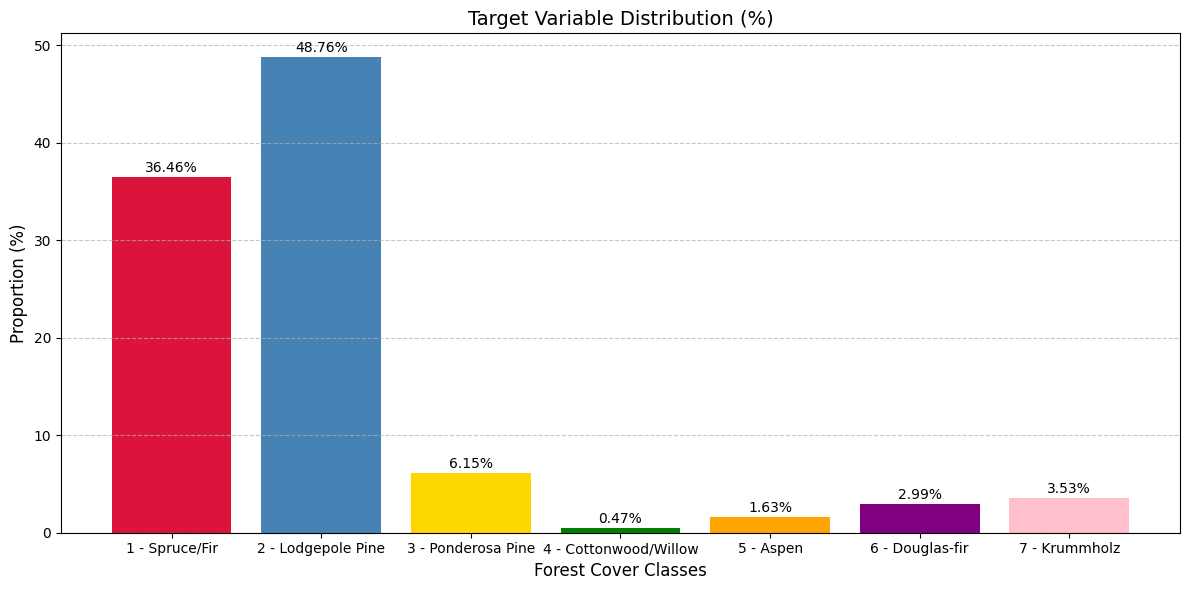

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualization of target variable

class_names = ['1 - Spruce/Fir', '2 - Lodgepole Pine', '3 - Ponderosa Pine', '4 - Cottonwood/Willow', '5 - Aspen', '6 - Douglas-fir', '7 - Krummholz']

# Calculate the proportions of the classes
class_counts = df['class'].value_counts(normalize=True).sort_index() * 100

# Convert the numeric class labels to class names
class_labels = [class_names[i] for i in range(len(class_counts))]

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(class_labels, class_counts, color=['crimson', 'steelblue', 'gold', 'green', 'orange', 'purple', 'pink'])

# Write percentages above the bars
for bar, percentage in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', fontsize=10)

# Graph settings
plt.title('Target Variable Distribution (%)', fontsize=14)
plt.xlabel('Forest Cover Classes', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I see that our target variable has too many unbalanced data. While there are too many examples in class 1 and 2 variables, there are not too many examples in others. Therefore, while our model can predict the variables of these classes well, it may have difficulty in predicting the other class variables. Therefore, I plan to increase the number of samples of class variables with few samples by using **SMOTE**

## 2. Data Cleaning and Preprocessing

In [9]:
df.isna().sum().sum() # There are no nan values.

np.int64(0)

In [10]:
df.duplicated().sum() # There are no duplicate values.

np.int64(0)

I wanted to create a continous_columns variable because I will perform **outlier analysis** on these columns

In [11]:
continuous_columns = ['Elevation', 'Aspect', 'Slope',
                      'Horizontal_Distance_To_Hydrology',
                      'Vertical_Distance_To_Hydrology',
                      'Horizontal_Distance_To_Roadways',
                      'Hillshade_9am', 'Hillshade_Noon',
                      'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [12]:
from scipy.stats import zscore

# calculating outliers in continuous columns removing them from the data set

def remove_outliers(df, continuous_columns, threshold=4):
    while True:
        data_zscore = df[continuous_columns].apply(zscore)

        outliers_index = df[(data_zscore.abs() > threshold).any(axis=1)].index

        if len(outliers_index) == 0:
            break
        df = df.drop(outliers_index, axis=0).copy()
    
    return df

df = remove_outliers(df, continuous_columns, threshold=4)

In [ ]:
# checking the number of outliers

data_zscore = df[continuous_columns].apply(zscore)
z_score_outliers = df[(data_zscore.abs() > 4).any(axis=1)]

print("Number of new outliers:", len(z_score_outliers))

Number of new outliers: 0


I removed outliers to improve the accuracy of the model and to obtain more robust results. Outliers can make the model difficult to learn and time consuming, so cleaning the data is an important step to improve performance.

In [14]:
df.shape

(569699, 55)

When I looked at this result, I saw that 11,313 samples were missing from 581,012 samples, which is approximately 0.019% of the data. There was not much data loss.

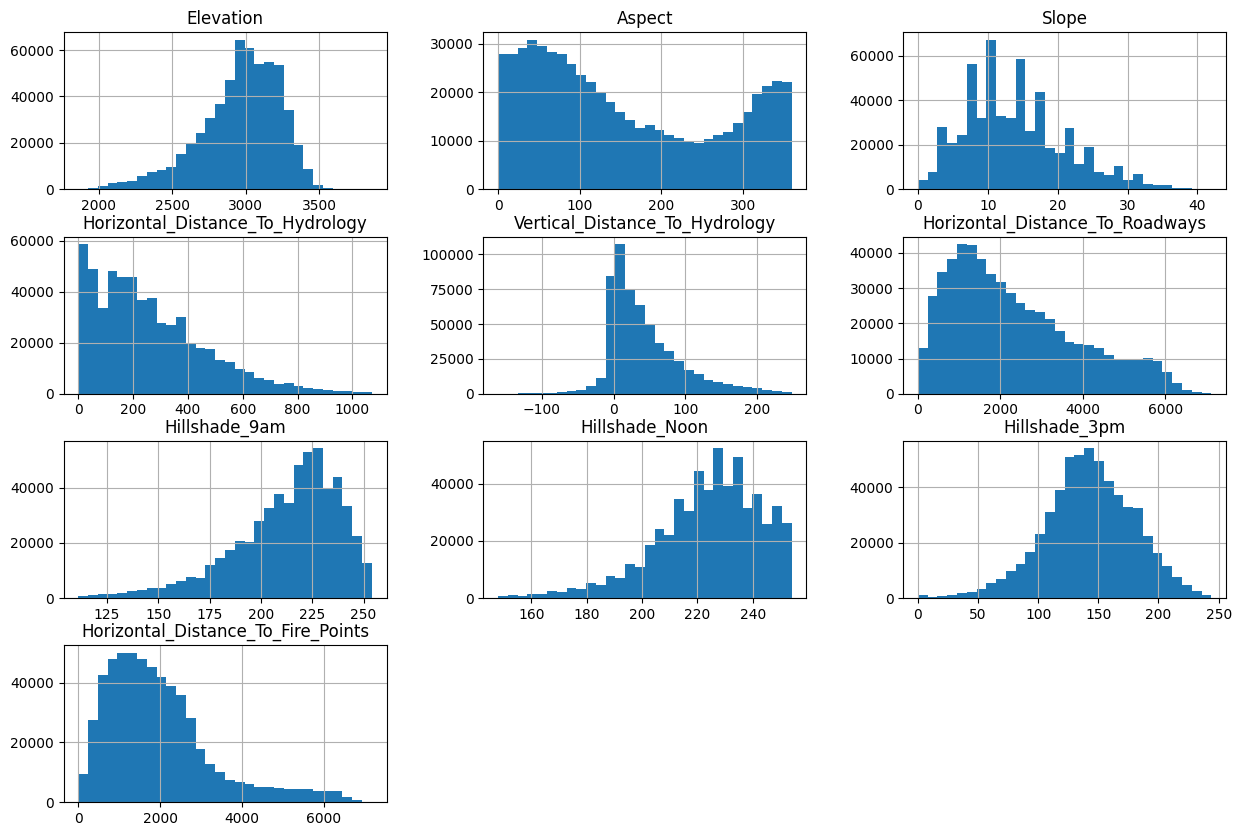

In [ ]:
# Histograms of continuous variables

df[continuous_columns].hist(bins=30, figsize=(15, 10))
plt.show()

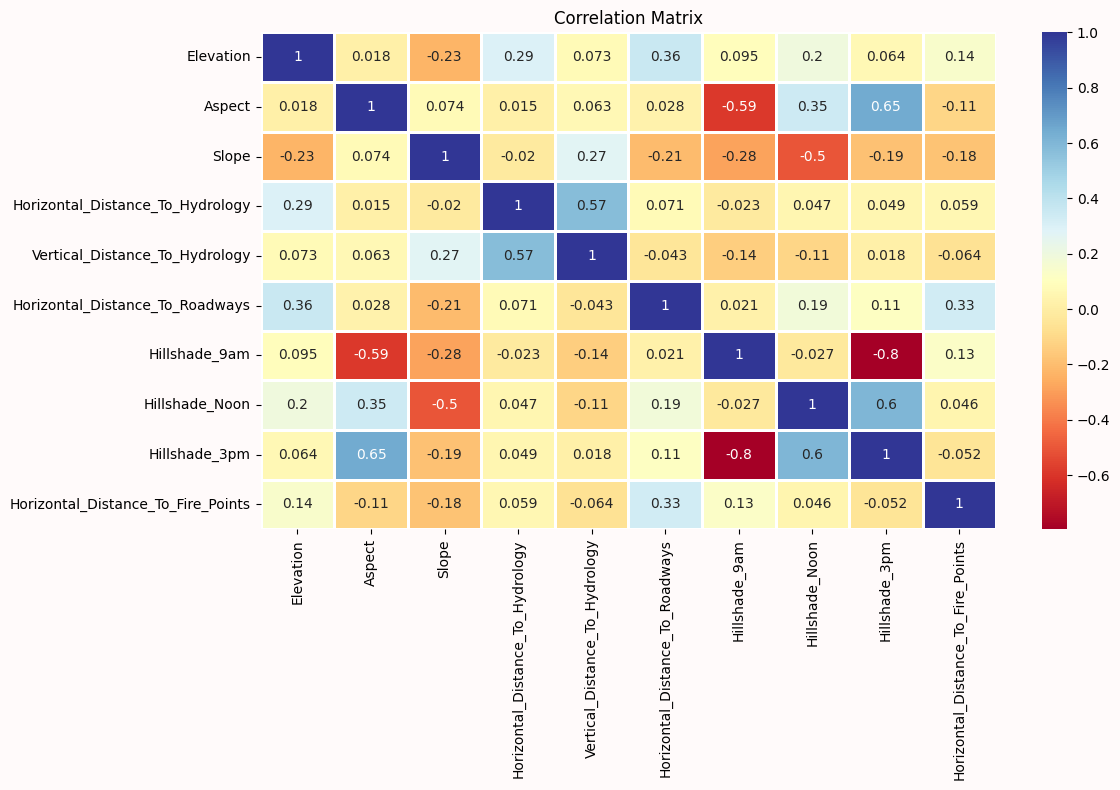

In [16]:
corr_mat = df[continuous_columns].corr()

plt.figure(figsize = (12, 8), facecolor = 'snow')
sns.heatmap(corr_mat,annot = True,cbar = True,cmap = 'RdYlBu',linewidths = 2)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

When I look at the correlation heatmap, I see a very strong negative correlation between Hillshade_9am and Hillshade_3pm. Such strong correlations can make the model difficult to learn and lead to unnecessary calculations. Therefore, I chose to remove one of these two variables so that the model can run more efficiently.

In [17]:
df.drop("Hillshade_3pm", axis=1, inplace=True)

## 3. Splitting and Balancing the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# train test split

features = df.drop('class', axis=1)
labels = df['class']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((455759, 53), (113940, 53), (455759,), (113940,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

The reason I standardised the data was that the continuous variables in particular have very large ranges. This can make it difficult for the model to understand which features it should find more important. By standardising, I put all the variables on a similar scale, so the model can learn more quickly and accurately by considering each one equally. In other words, having the data closer together makes the model's job easier.

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sampling_strategy = {
    3: 39000,
    4: 6000,
    5: 27000,
    6: 25000,
    7: 16000
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
features_train, labels_train = smote.fit_resample(features_train, labels_train)

print("Class Distribution After SMOTE:", Counter(labels_train))

Class Distribution After SMOTE: Counter({2: 222750, 1: 167084, 3: 39000, 5: 27000, 6: 25000, 7: 16000, 4: 6000})


The reason I used SMOTE was that I wanted to address class imbalance in my dataset. Some classes have many more instances than others (e.g. 1 and 2), which can cause the model to focus on frequent classes and ignore less frequent ones. To compensate for this, I set a target number of instances for each class. Using a sampling strategy, I added more instances to the less frequent classes so that the model learns each class equally. 

I also did not sample them all the same number of times. because smote only needs to be applied to the training data. So if I sample all classes the same number of times in the training data, this time the training set and the test set will not match and I can get a low accuracy value. So I have sampled a certain amount of classes with fewer instances, taking this balance into account.

## 4. Building and Training the Model

In [21]:
import setuptools.dist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

# building the model

model = Sequential()

model.add(InputLayer(shape=(features_train.shape[1],)))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(8,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,320 (223.91 KB)

 Trainable params: 57,320 (223.91 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# training the model

es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)

history = model.fit(features_train, labels_train, epochs=50, batch_size=1024, validation_split=0.1, callbacks=[es], verbose=0)

## 5. Evaluating the Performance

In [24]:
loss, acc = model.evaluate(features_test, labels_test)

print(f"Test Accuracy: {acc:.3f}")
print(f"Test Loss: {loss:.3f}")

3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9038 - loss: 0.2419
Test Accuracy: 0.903
Test Loss: 0.244


The first time I trained the deep learning model I got 90% accuracy, which is very good. It's also good that the loss value is low and close to zero

In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(features_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ['Spruce/Fir', 'Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen', 'Douglas-fir', 'Krummholz']

print(classification_report(labels_test, y_pred,target_names=class_names))

3561/3561 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.91      0.89      0.90     41771
   Lodgepole Pine       0.91      0.93      0.92     55688
   Ponderosa Pine       0.87      0.90      0.88      6796
Cottonwood/Willow       0.94      0.56      0.70       545
            Aspen       0.77      0.69      0.73      1886
      Douglas-fir       0.79      0.80      0.80      3409
        Krummholz       0.91      0.91      0.91      3845

         accuracy                           0.90    113940
        macro avg       0.87      0.81      0.83    113940
     weighted avg       0.90      0.90      0.90    113940



When I look at the Spruce/Fir and Lodgepole Pine classes, the model has done a really good job. Both precision, recall and f1-score are very high. So it predicted these classes almost perfectly. And this is actually logical, because these classes contain quite a lot of samples.

There are slightly lower values for the Ponderosa Pine grade. Recall is 0.90, but precision is slightly lower (0.87). But it is still a pretty good result. This means that the model predicts mostly correctly, but sometimes there are misclassifications.

The Cottonwood/Willow and Aspen classes are where the model struggled a bit. In Cottonwood/Willow, the recall is very low (0.56), meaning that it had difficulty recognising this class. However, precision is very high (0.94), so it is quite successful in the examples where it predicts correctly. 

There is a similar situation in the Aspen class. Recall is slightly lower (0.69) but still acceptable.

The Douglas-fir and Krummholz classes are slightly less challenging for the model. Their performance is not as good as Spruce/Fir and Lodgepole Pine but still quite strong. In these classes, both precision and recall are close to each other and generally a good performance is displayed.

When I look at the Macro avg and Weighted avg results, I can say that the model performs well in general. Especially in Weighted avg, the success rate is quite high (0.90), which shows that the model is quite good at making accurate predictions in most classes. The slightly lower values in Macro avg are due to the classes with fewer samples.

In conclusion, the model is very good in most classes, especially in large classes. It struggled a bit in the small classes, but overall it still got good results.

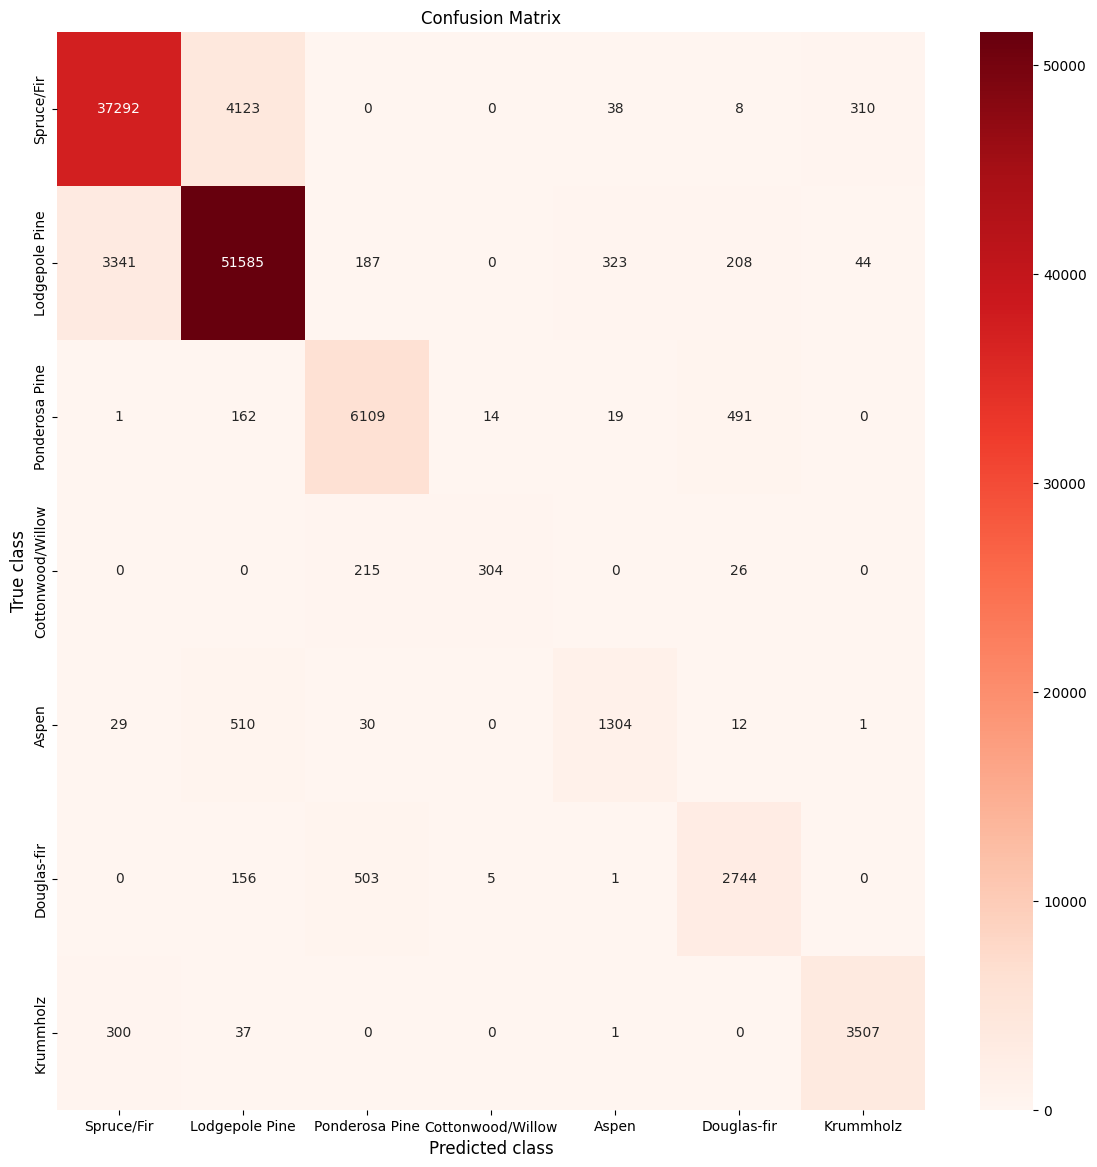

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_test, y_pred)

fig, ax = plt.subplots(figsize=(14, 14))
heatmap = sns.heatmap(cm, fmt='g', cmap='Reds', annot=True, ax=ax)
ax.set_xlabel('Predicted class',fontsize=12)
ax.set_ylabel('True class',fontsize=12)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

The numbers along the diagonal of the heatmap show how many were correctly classified. All other numbers on either sides of the diagonal show mis-classifications. I see that Cottonwood Willow, Aspen and Douglas-Fir suffer from a high rate of misclassification. Hyperparameter adjustment can be made to improve performance.

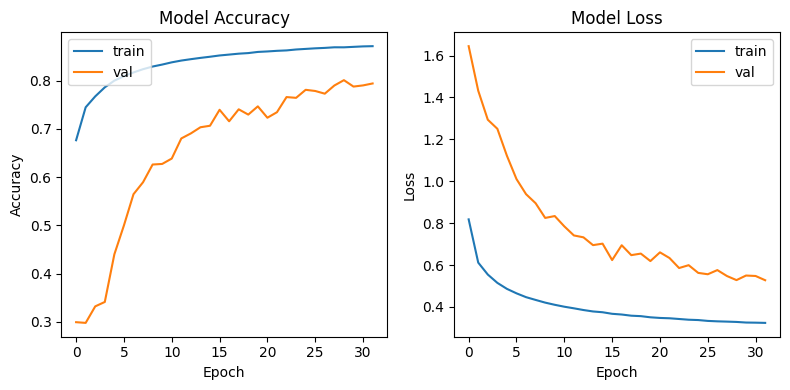

In [28]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss plot
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Looking at the graphs, I also noticed that there was a bit of overfitting.

**Results from Graphs:**

The training accuracy increases almost perfectly and plateaus, but the validation accuracy starts to fluctuate after a certain point. In other words, the model may have learnt the training data very well, but it may not be able to achieve the same success with new data.
There is a similar situation in the loss graph. While the training loss decreases steadily, the validation loss stops decreasing after a certain point and shows slight fluctuations.

**What Does This Mean?**

Most likely, the model has adapted a little too much to the training data, that is, overlearaning has started. Therefore, it may not perform as well when tested with new data. With a more powerful computer I could fix this by hyperparameter optimisation, but even as it is now 90% accuracy is a really good result.

**What can be done to improve it?**

If I want to improve this model further in the future, I can try the following:

- Tuning hyperparameters
- Train with a larger and more balanced data set
- Fine-tuning the learning rate and batch size

## 6. Conclusion and Summary

In this project, a successful deep learning model was built to classify forest cover types with high accuracy. The approach involved extensive data preprocessing, feature scaling and handling class imbalances using SMOTE to provide balanced training data. The final model demonstrated strong predictive capability, achieving an impressive accuracy of 90% with a loss of 0.24.

**Key Takeaways:**

- Effective Data Preprocessing: I removed outliers, scaled numerical features, and balanced the dataset using SMOTE to improve the performance of the model.

- High Classification Performance: The model achieved a strong accuracy of 90% with precision and recall scores indicating reliable predictions across different forest cover types.

- Overfitting Observed: While the training accuracy steadily increased, the validation accuracy plateaued. Similarly, loss curves showed signs of overfitting, suggesting that the model memorises patterns rather than generalising optimally.

**Future Improvements:**

- Address Overfitting: Implementing Dropout layers and L2 regularization can help mitigate overfitting and improve generalization.
- Fine-Tune Hyperparameters: Further hyperparameter optimization, particularly for learning rate, batch size, and optimizer selection, could enhance model efficiency.
- Optimize SMOTE Strategy: Adjusting SMOTE resampling parameters to prevent excessive oversampling in minority classes can help maintain a more natural class distribution.
- Explore Feature Engineering: Investigating additional feature transformations or dimensionality reduction methods could enhance classification performance.

**Final Thoughts:**

Despite computational limitations preventing exhaustive hyperparameter tuning, this model provides a strong foundation for forest cover type classification. With additional fine-tuning and optimization, it has the potential to be deployed in real-world applications for forest management and ecological studies. Future iterations can focus on reducing overfitting while maintaining high accuracy.

**Next Steps:** If computational resources allow, I can revisit this project to refine hyperparameters and explore more advanced techniques. However, even in its current state, this model effectively differentiates between forest cover types with remarkable accuracy.